In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas
from sklearn import metrics
import urllib2
from scipy import stats
from sklearn.metrics.cluster import adjusted_rand_score
import seaborn as sns

In [2]:
tt = np.loadtxt(urllib2.urlopen('http://bx.psu.edu/~lua137/OnTAD/rebuttal/testadjr2allparameter_hsz5_KRnorm_Gm12878.txt'))

In [3]:
tt2 = np.loadtxt(urllib2.urlopen('http://bx.psu.edu/~lua137/OnTAD/rebuttal/testadjr2allparameter_hsz5_KRnorm_rand_Gm12878.txt'))

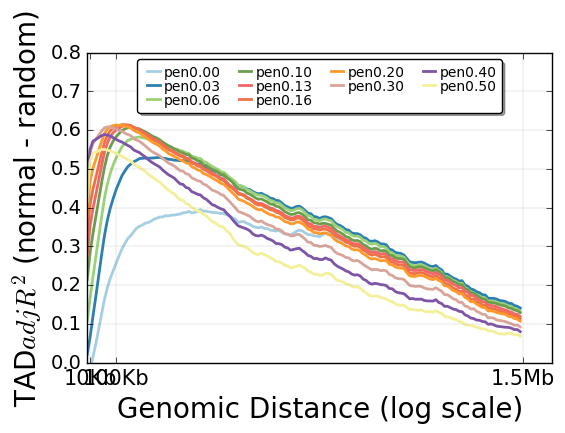

In [6]:
num_plots = 10
penlist = [0,0.03,0.06,0.1,0.13,0.16,0.2,0.3,0.4,0.5]

colormap = plt.cm.Paired
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, num_plots)])

x = np.arange(10)
labels = []
for i in range(0, 0+num_plots):
    plt.plot(tt[i,0:150]-tt2[i,0:150],linewidth=2)
    labels.append(r'pen%1.2f' % (penlist[i]))

plt.legend(labels, ncol=4, loc='upper center', 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True, fontsize=10)
#plt.xscale('log')
plt.ylabel('TAD$adjR^2$ (normal - random)', {'color': 'k', 'fontsize': 20})
plt.xlabel('Genomic Distance (log scale)', {'color': 'k', 'fontsize': 20})
plt.yticks(color='k',size=14)
plt.xticks((1,10,150),('10Kb', '100Kb','1.5Mb'),color='k',size=15)
plt.ylim(0,0.8)
plt.xlim(0,160)
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
#plt.savefig("/Users/linan/Desktop/parameter_tadrsquared.png", transparent=True, dpi = 200, bbox_inches='tight')
plt.show()


pen0.00 area = 0.429
pen0.03 area = 0.533
pen0.06 area = 0.550
pen0.10 area = 0.554
pen0.13 area = 0.548
pen0.16 area = 0.544
pen0.20 area = 0.535
pen0.30 area = 0.501
pen0.40 area = 0.456
pen0.50 area = 0.404


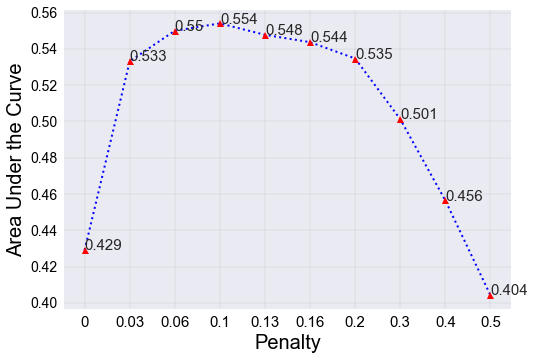

In [7]:
from scipy.integrate import simps
alist = []
for i in range(0, 0+num_plots):
    area = simps(tt[i,0:150]-tt2[i,0:150], dx=0.01)
    alist.append(area)
    print r'pen%1.2f area = %1.3f'% (penlist[i], area)

plt.figure(6)
fig,ax = plt.subplots(1)
ax.plot(alist,c='b',linewidth=2, linestyle=':')
for i,j in zip((0,1,2,3,4,5,6,7,8,9),alist):
    ax.annotate(str(round(j,3)),xy=(i,j), fontsize=15)
plt.plot(alist, 'r^')
plt.ylabel('Area Under the Curve', {'color': 'k', 'fontsize': 20})
plt.xlabel('Penalty', {'color': 'k', 'fontsize': 20})
plt.yticks(color='k',size=14)
plt.xticks((0,1,2,3,4,5,6,7,8,9),(penlist),color='k',size=15)
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.savefig("/Users/linan/Desktop/parameter_auc.png", transparent=True, dpi = 200, bbox_inches='tight')
plt.show()

In [32]:
stats.ttest_ind(tt[4,0:150],tt[0,0:150])

Ttest_indResult(statistic=-1.2235197992952322, pvalue=0.22209999744742945)